<a href="https://colab.research.google.com/github/fatuunreal/dm4/blob/main/dm4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pada eksperimen kali ini saya FATU RAHMAT
A11.2022.14831 akan memprediksi hasil panen dalam ton dengan Multiple Linear Regression.

Pada dataset ini saya menggunakan 2 variable independent yaitu Luas Panen (ha) dan Produktivitas (ku/ha) untuk menentukan Produksi (ton) pada eksperimen ini didapatkan akurasi senilai 98%



In [58]:
import pandas as pd

# Membaca data dari file CSV
file_path = 'data-bps.csv'  # Sesuaikan dengan nama file yang diunggah
data = pd.read_csv(file_path)

# Menampilkan data awal untuk memahami strukturnya
print(data.head())

      38 Provinsi                                         Unnamed: 1  \
0             NaN  Luas Panen, Produksi, dan Produktivitas Padi M...   
1             NaN                                    Luas Panen (ha)   
2             NaN                                               2024   
3            ACEH                                          301081.97   
4  SUMATERA UTARA                                          419089.12   

              Unnamed: 2      Unnamed: 3  
0                    NaN             NaN  
1  Produktivitas (ku/ha)  Produksi (ton)  
2                   2024            2024  
3                  54.58      1643355.07  
4                   51.4      2154117.08  


In [28]:
# Gabungkan header kolom pertama dengan baris header kedua agar lebih rapi
data.columns = ['Provinsi', 'Luas Panen (ha)', 'Produktivitas (ku/ha)', 'Produksi (ton)']

# Hapus baris-baris yang memiliki nilai NaN pada kolom 'Provinsi'
data_cleaned = data.dropna(subset=['Provinsi'])

# Tampilkan data bersih
print(data_cleaned.head())

# Simpan data bersih ke file baru
data_cleaned.to_csv('data_bersih.csv', index=False)

         Provinsi Luas Panen (ha) Produktivitas (ku/ha) Produksi (ton)
3            ACEH       301081.97                 54.58     1643355.07
4  SUMATERA UTARA       419089.12                  51.4     2154117.08
5  SUMATERA BARAT       296215.93                 45.64     1352048.77
6            RIAU        57003.35                 39.62       225836.5
7           JAMBI        64119.24                 45.44      291367.31


In [59]:
data_baru = pd.read_csv('data_bersih.csv')
data_baru = data_baru.iloc[:-1]

In [60]:
data_baru.shape

(38, 4)

In [61]:
data_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Provinsi               38 non-null     object 
 1   Luas Panen (ha)        38 non-null     float64
 2   Produktivitas (ku/ha)  38 non-null     float64
 3   Produksi (ton)         38 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.3+ KB


In [62]:
data_baru.describe()

,Luas Panen (ha),Produktivitas (ku/ha),Produksi (ton)
count,3.800000e+01,38.000000,3.800000e+01
mean,2.643805e+05,44.169737,1.385769e+06
std,4.275318e+05,9.321203,2.433257e+06
min,2.668000e+01,14.790000,1.133300e+02
25%,2.031937e+04,39.627500,7.904314e+04
50%,8.082736e+04,45.250000,3.506010e+05
75%,2.921686e+05,50.882500,1.428100e+06
max,1.616235e+06,60.430000,9.226340e+06


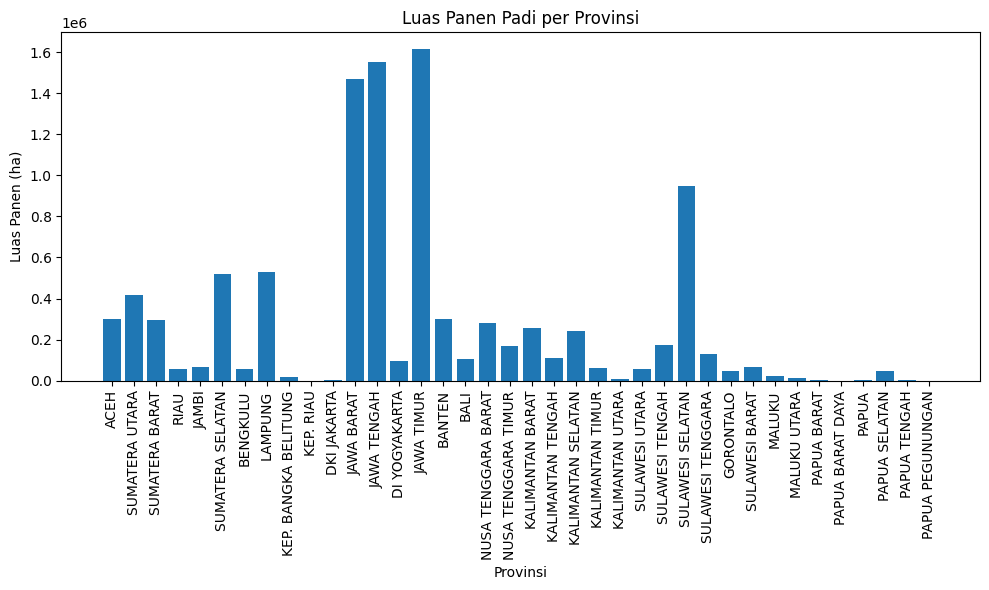

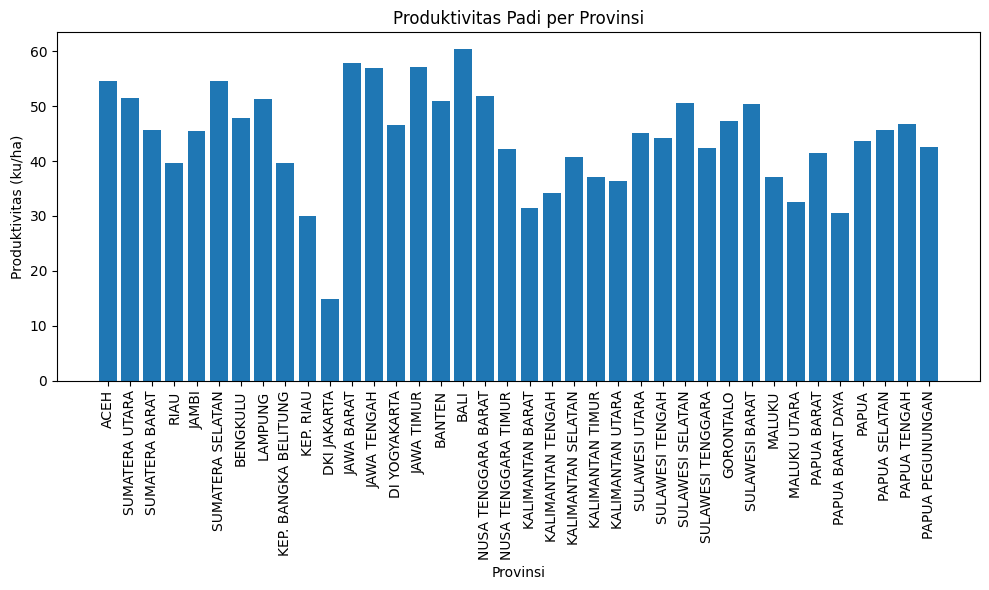

In [64]:


# Membuat diagram batang untuk Luas Panen
plt.figure(figsize=(10, 6))  # Mengatur ukuran gambar
plt.bar(data_baru['Provinsi'], data_baru['Luas Panen (ha)'])
plt.xlabel('Provinsi')
plt.ylabel('Luas Panen (ha)')
plt.title('Luas Panen Padi per Provinsi')
plt.xticks(rotation=90)  # Memutar label sumbu x agar mudah dibaca
plt.tight_layout()  # Mengatur tata letak agar label tidak terpotong
plt.show()

# Membuat diagram batang untuk Produktivitas
plt.figure(figsize=(10, 6))
plt.bar(data_baru['Provinsi'], data_baru['Produktivitas (ku/ha)'])
plt.xlabel('Provinsi')
plt.ylabel('Produktivitas (ku/ha)')
plt.title('Produktivitas Padi per Provinsi')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

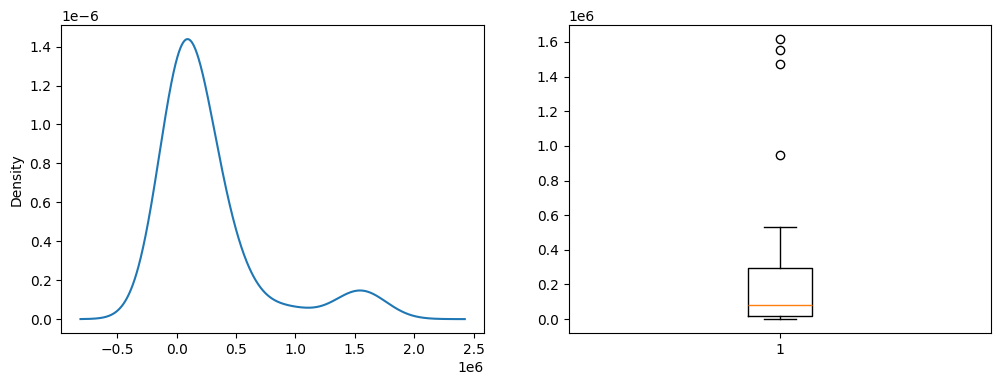

In [71]:
# Univariate analysis Luas Panen (ha)
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data_baru['Luas Panen (ha)'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data_baru['Luas Panen (ha)'])
plt.show()

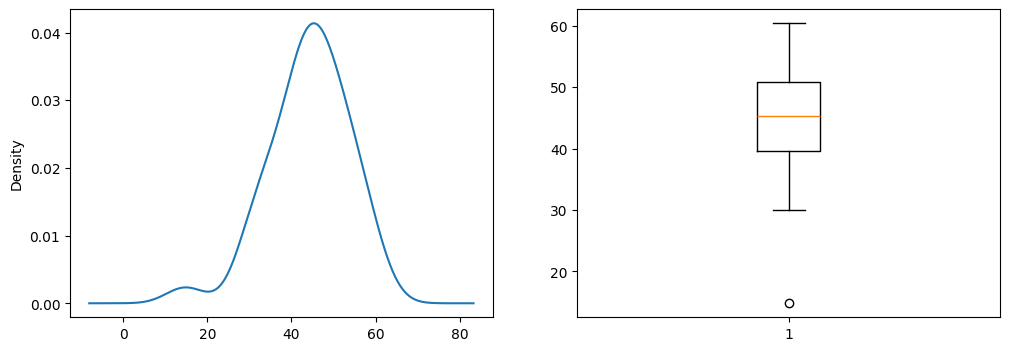

In [72]:
# Univariate analysis Luas Panen (ha)
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data_baru['Produktivitas (ku/ha)'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data_baru['Produktivitas (ku/ha)'])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x800 with 0 Axes>

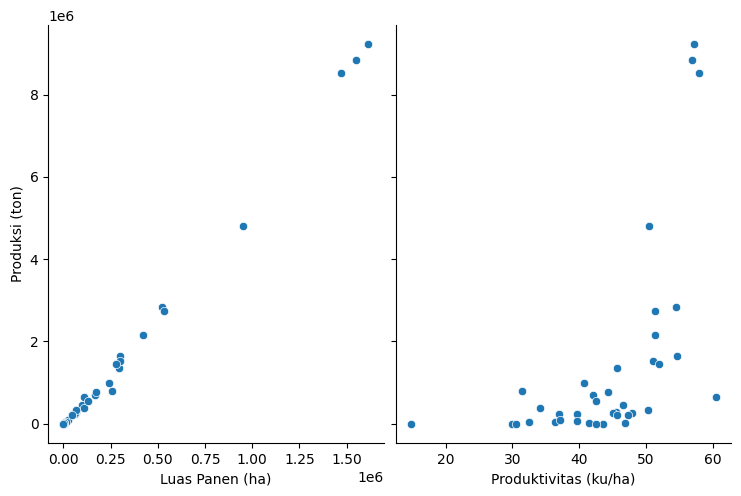

In [81]:
# Bivariate analysis using pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(data=data_baru, x_vars=['Luas Panen (ha)', 'Produktivitas (ku/ha)'], y_vars=['Produksi (ton)'], size=5, aspect=0.75)
plt.show()

                       Luas Panen (ha)  Produktivitas (ku/ha)  Produksi (ton)
Luas Panen (ha)               1.000000               0.561906        0.997663
Produktivitas (ku/ha)         0.561906               1.000000        0.567734
Produksi (ton)                0.997663               0.567734        1.000000


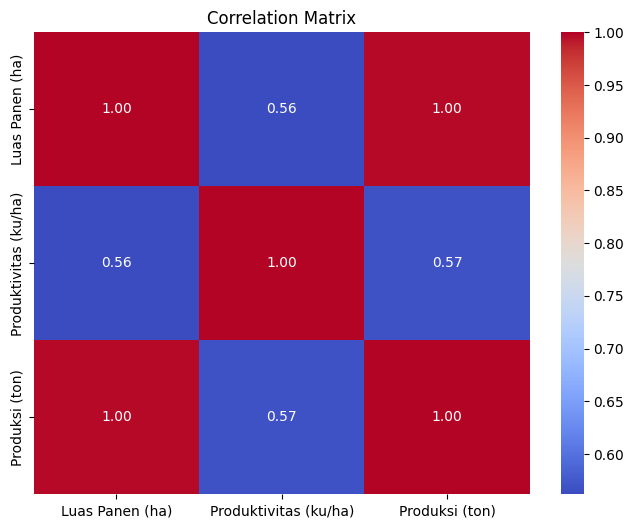

In [85]:
# Calculate the correlation matrix
correlation_matrix = data_baru[['Luas Panen (ha)', 'Produktivitas (ku/ha)', 'Produksi (ton)']].corr()

print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [87]:
#Recall data kita
data_baru.head()

,Provinsi,Luas Panen (ha),Produktivitas (ku/ha),Produksi (ton)
0,ACEH,301081.97,54.58,1643355.07
1,SUMATERA UTARA,419089.12,51.40,2154117.08
2,SUMATERA BARAT,296215.93,45.64,1352048.77
3,RIAU,57003.35,39.62,225836.50
4,JAMBI,64119.24,45.44,291367.31


In [92]:

# Pisahkan fitur (X) dan target (y)
X = data_baru[['Luas Panen (ha)', 'Produktivitas (ku/ha)']]
y = data_baru['Produksi (ton)']

# Bagi data menjadi data latih (70%) dan data uji (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Cetak ukuran data latih dan data uji
print("Ukuran data latih:", X_train.shape, y_train.shape)
print("Ukuran data uji:", X_test.shape, y_test.shape)

Ukuran data latih: (26, 2) (26,)
Ukuran data uji: (12, 2) (12,)


In [98]:
#train the model menggunakan training data yang sudah displit
lin_reg.fit(X_train, y_train)

LinearRegression()

In [112]:
#cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[   5.71734479 2993.01975418]
-256091.27645445056


In [102]:
#Kita coba buat kedalam dataframe agar kebih rapi
coef_dict = {
    'features': X.columns, # Change x.columns to X.columns
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,Luas Panen (ha),5.717345
1,Produktivitas (ku/ha),2993.019754


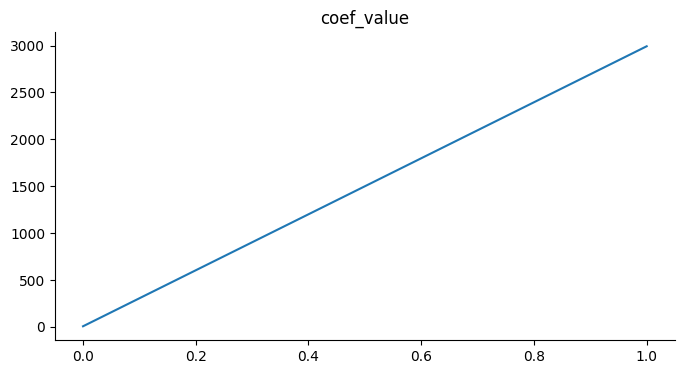

In [111]:
# @title coef_value

from matplotlib import pyplot as plt
coef['coef_value'].plot(kind='line', figsize=(8, 4), title='coef_value')
plt.gca().spines[['top', 'right']].set_visible(False)

In [105]:
y_pred = lin_reg.predict(X_test)

In [107]:
#kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(X_test, y_test)

0.9821776774488928

In [110]:
#Prediksi produksi padi
lin_reg.predict([[150000, 40]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([721231.23186973])